### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 8.8 MB/s eta 0:00:00a 0:00:01


In [2]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

NameError: name 'plt' is not defined

In [ ]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

/Users/mcgowkb1/ASTR8070/repos/astr_8070_s24/coursework/homeworks/hw_data/hw7_data_1.npy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
file = '/Users/mcgowkb1/ASTR8070/repos/astr_8070_s24/coursework/homeworks/hw_data/hw7_data_1.npy'
data = np.load(file)

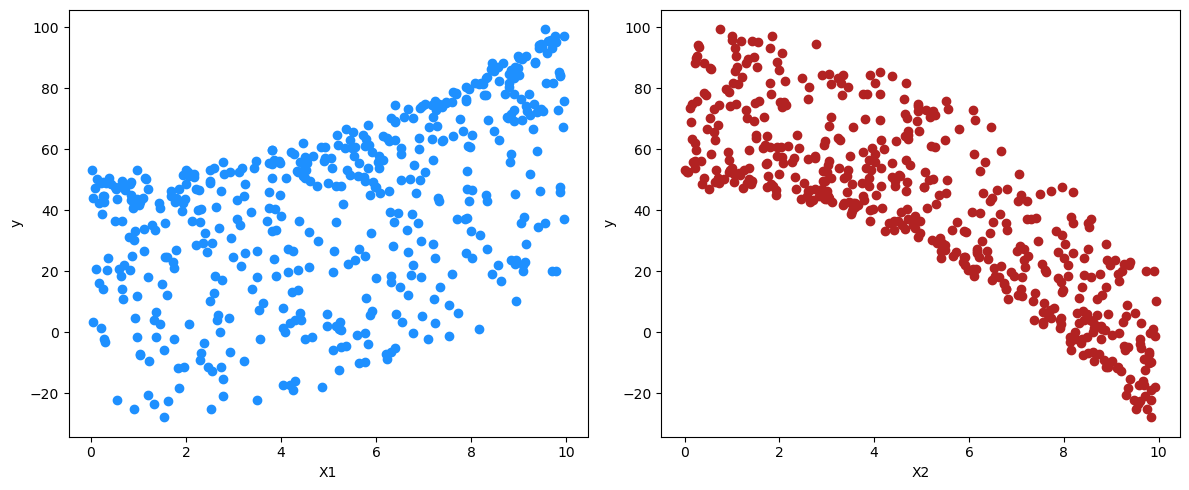

In [7]:
# Label data
X = data[:, :2]
y = data[:, 2]
yerr = data[:, 3]

# What does the data look like?
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], y, color = 'dodgerblue', label='Feature 1')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('y')

ax[1].scatter(X[:, 1], y, color='firebrick', label='Feature 2')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('y')

plt.tight_layout()
plt.show()


Intercept: 57.1010232329955
Slope for Feature 1: 4.94873016117838
Slope for Feature 2: -8.300234070064482


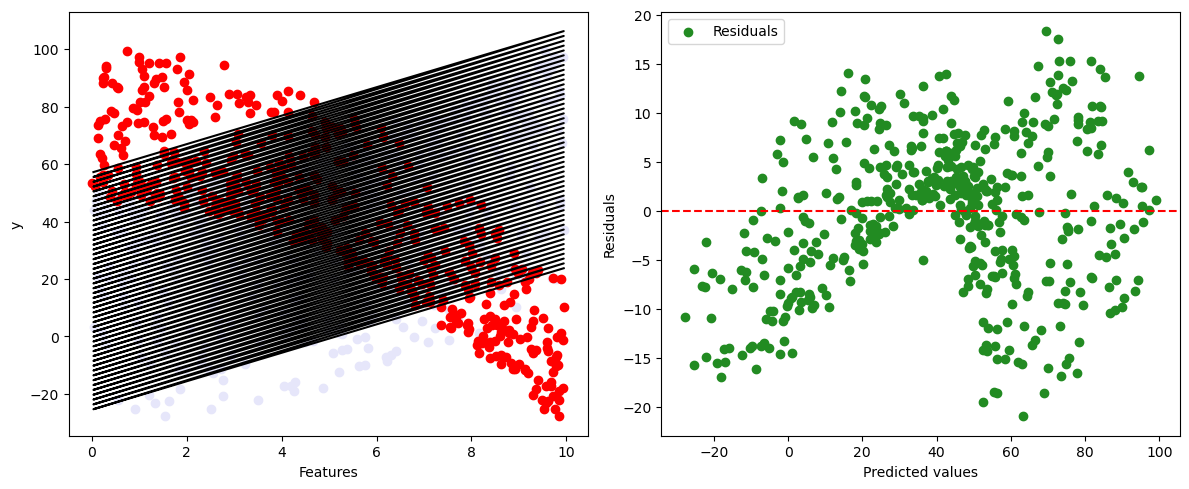

In [17]:
from astroML.linear_model import LinearRegression


# Activate linear regression (LR)
model = LinearRegression()
model.fit(X, y, yerr)

# Find theintercept and slopes
print("Intercept:", model.coef_[0])
print("Slope for Feature 1:", model.coef_[1])
print("Slope for Feature 2:", model.coef_[2])

# Prediction grid
Xgrid = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
Xgrid = np.array(Xgrid).reshape(2, -1).T

# Predictions
y_pred = model.predict(Xgrid)

# Plot with the best-fit model
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of the data
ax[0].scatter(X[:, 0], y, color='lavender', label='Feature 1')
ax[0].scatter(X[:, 1], y, c='r', label='Feature 2')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('y')

# Plot the best-fit model
ax[0].plot(Xgrid[:, 0], y_pred, 'k-', label='Best-fit model')

# Residual plot
ax[1].scatter(y, y - model.predict(X), color='forestgreen', label='Residuals')
ax[1].axhline(0, color='r', linestyle='--')
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()


SRT: The fit parameters look good, Kaylah. But the visualization is a little confusing. It would have been better to plot a straight line with the slope of each feature on an x-y scatter plot for each feature. -2 points.

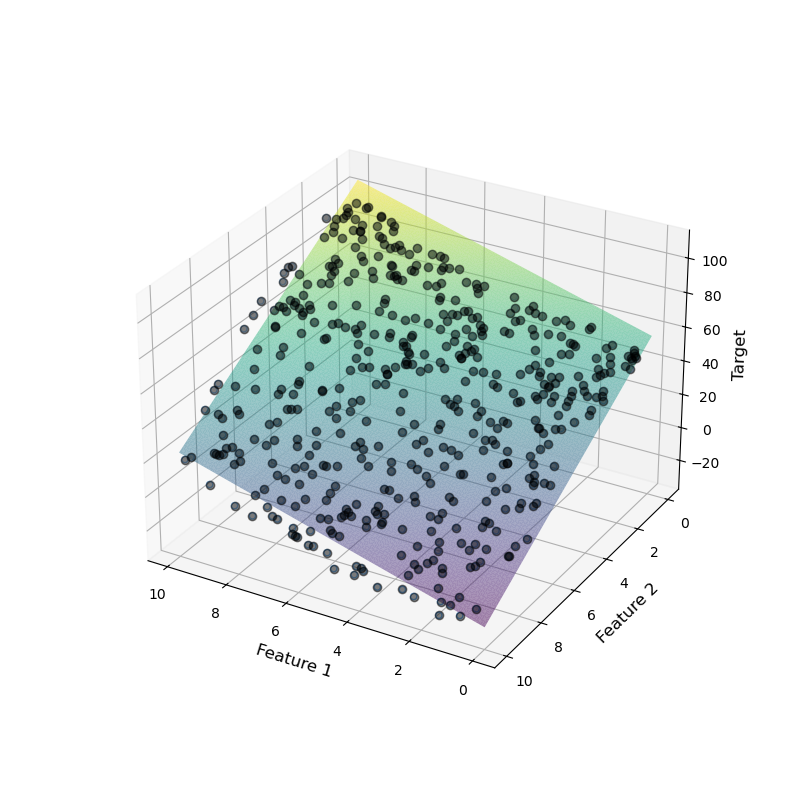

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Prediction meshg
X0, X1 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                      np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Xgrid = np.array([X0.ravel(), X1.ravel()]).T
y_pred = model.predict(Xgrid)

# 3D interactive plot
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot(X[:, 0], X[:, 1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(X[:, 0], X[:, 1], y, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

# Plot best-fit model
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], y_pred, linewidth=0, alpha=0.5, cmap='viridis')
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.view_init(elev=28, azim=120)

plt.show()

#WOAHHHH


GridSearchCV best parameters: {'alpha': 1.0, 'solver': 'svd'}
GridSearchCV best score: 0.9290800590702192


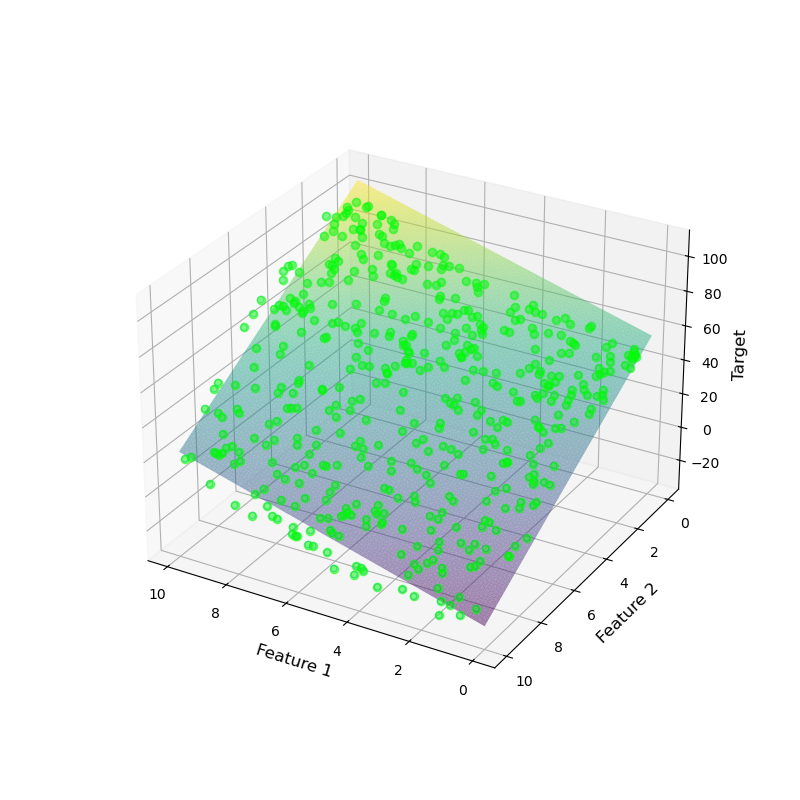

RidgeCV best alpha: 1.0


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV

# Param grid for GridSearch
ridge_params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0], 'solver': ['svd', 'lsqr']}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=ridge_params, cv=5)
grid.fit(X, y)

# Best parameters & best score from GS
print("GridSearchCV best parameters:", grid.best_params_)
print("GridSearchCV best score:", grid.best_score_)

# Fit the data w/ the best parameters from GS
ridge_best = Ridge(**grid.best_params_)
ridge_best.fit(X, y)

# Prediction meshgrid for 2D feature space
X0, X1 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                      np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Xgrid = np.array([X0.ravel(), X1.ravel()]).T
y_pred = ridge_best.predict(Xgrid)

# 3D plot with the data & best-fit model
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot(X[:, 0], X[:, 1], y, color='lime', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(X[:, 0], X[:, 1], y, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

# Plot best-fit model
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], y_pred, linewidth=0, alpha=0.5, cmap='viridis')e
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.view_init(elev=28, azim=120)

plt.show()


SRT: Good.

/Users/mcgowkb1/opt/anaconda3/envs/ASTR8070/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/var/folders/70/kx5f64q51pxcnd0vjd5s9k480000gp/T/ipykernel_83404/3661597596.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], color = 'yellow', cmap='viridis')
/var/folders/70/kx5f64q51pxcnd0vjd5s9k480000gp/T/ipykernel_83404/3661597596.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], color = 'yellow', cmap='viridis')


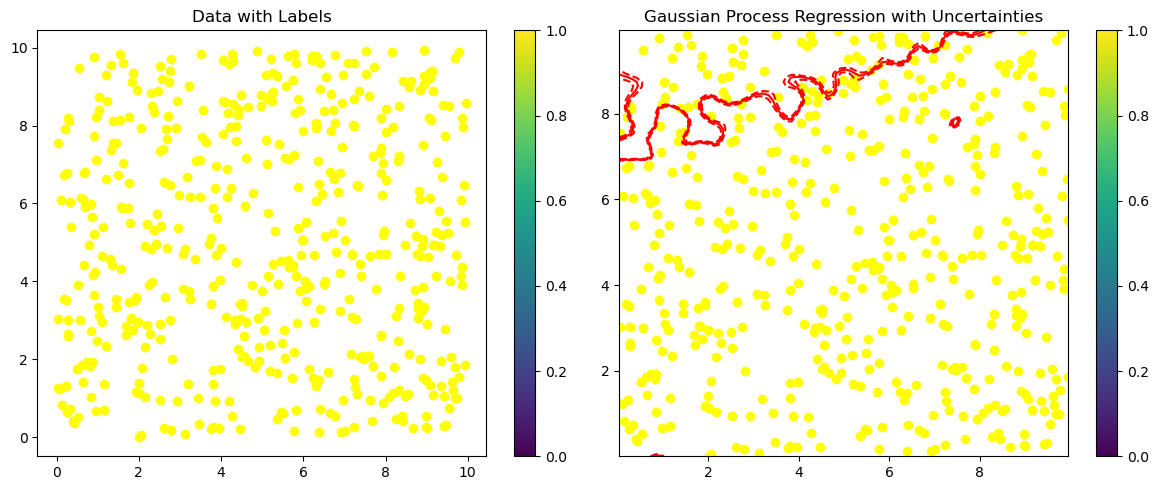

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


# Calculate alpha 
alpha = (yerr / y)**2

# Create a Gaussian Process Regressor 
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha,
                              n_restarts_optimizer=10, random_state=0)

# Fit the model w/ uncertainties
gp.fit(X, y)

# Create a meshgrid 
X0, X1 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                      np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Xgrid = np.array([X0.ravel(), X1.ravel()]).T

# Predict w/ uncertainties
y_pred, sigma = gp.predict(Xgrid, return_std=True)

# Reshape the predictions
y_pred = y_pred.reshape(X0.shape)
sigma = sigma.reshape(X0.shape)

# Plot data w/uncertainties
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color = 'yellow', cmap='viridis')
plt.colorbar()
plt.title('Data with Labels')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], color = 'yellow', cmap='viridis')
plt.colorbar()
plt.contour(X0, X1, y_pred, levels=[-1, 0, 1], colors='r', linestyles=['--', '-', '--'])
#plt.fill_between(X0[0], X0[-1], y_pred - sigma, y_pred + sigma, color='r', alpha=0.2)
plt.title('Gaussian Process Regression with Uncertainties')

plt.tight_layout()
plt.show()


SRT: No GP fitting without uncertainties? -2 points/

SRT: The visualization is again very confusing. What is it supposed to show? -2 points.

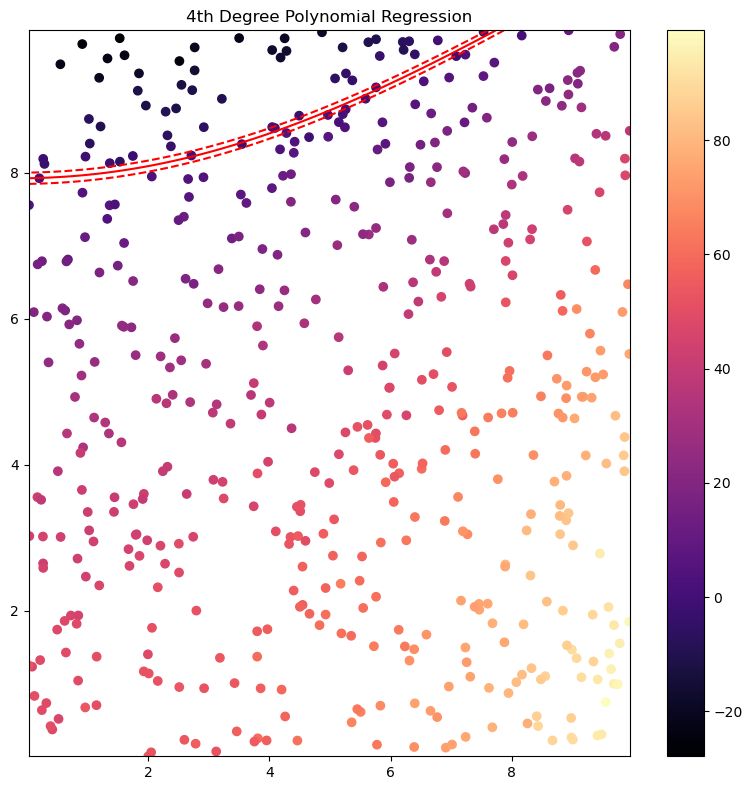

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a 4th degree polynomial regression
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Create a meshgrid
X0, X1 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                      np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Xgrid = np.array([X0.ravel(), X1.ravel()]).T

# Predict on the meshgrid
y_pred = model.predict(Xgrid)

# Reshape predictions 
y_pred = y_pred.reshape(X0.shape)

# Plot the data and the polynomial fit
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='magma')
plt.colorbar()
plt.contour(X0, X1, y_pred, levels=[-1, 0, 1], colors='r', linestyles=['--', '-', '--'])
plt.title('4th Degree Polynomial Regression')

plt.tight_layout()
plt.show()


SRT: Axis labels? Again, a confusing plot. Plus, where are the printed out fitted coefficients? -5 points.

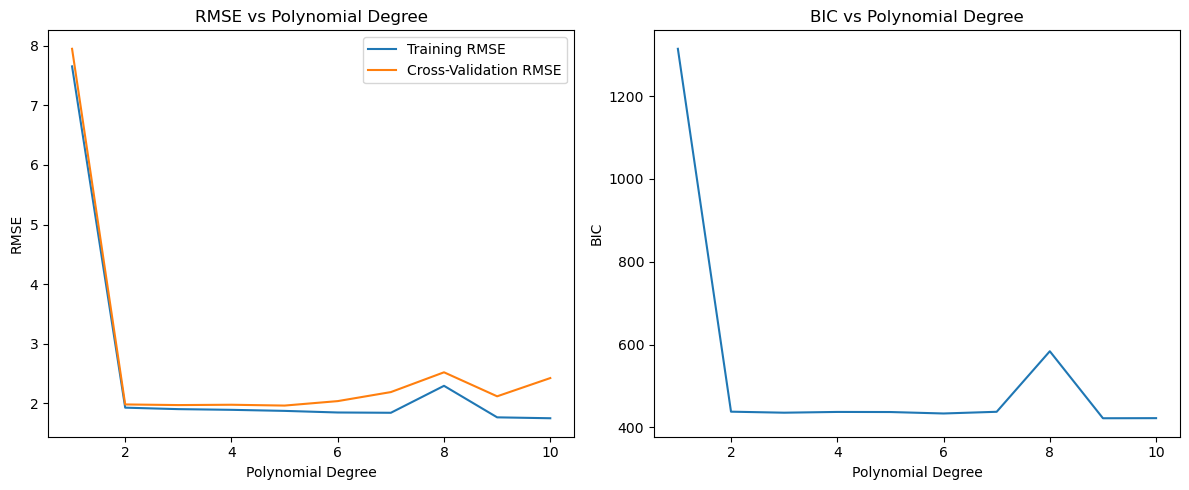

Testing RMSE for degree-5 polynomial: 1.9058504577209912


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


# Perform train-test split with a test_size of 20%
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2, random_state=0)

# Split out 20% of the training set as a cross validation set
X_train, X_cv, y_train, y_cv, yerr_train, yerr_cv = train_test_split(X_train, y_train, yerr_train, test_size=0.2, random_state=0)

degrees = np.arange(1, 11)
train_errors = []
cv_errors = []
bic_values = []
 
for degree in degrees:
    # Fit a polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Find RMSE for training and cross validation sets
    y_pred_train = model.predict(X_train)
    y_pred_cv = model.predict(X_cv)
    train_error = np.sqrt(mean_squared_error(y_train, y_pred_train))
    cv_error = np.sqrt(mean_squared_error(y_cv, y_pred_cv))
    train_errors.append(train_error)
    cv_errors.append(cv_error)

    # Find BIC
    n_samples = len(X_train)
    n_features = degree + 1  # Numb of features including the intercept
    log_likelihood = -0.5 * n_samples * np.log(np.mean((y_train - y_pred_train) ** 2))
    bic = n_features * np.log(n_samples) - 2 * log_likelihood
    bic_values.append(bic)

# Plot RMSE and BIC values as a function of polynomial degree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_errors, label='Training RMSE')
plt.plot(degrees, cv_errors, label='Cross-Validation RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, bic_values)
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC')
plt.title('BIC vs Polynomial Degree')

plt.tight_layout()
plt.show()

# Choose the best polynomial degree based on the min cross validation error
optimal_degree = degrees[np.argmin(cv_errors)]

# Train the model on all training data w/ the best degree
optimal_model = make_pipeline(PolynomialFeatures(optimal_degree), LinearRegression())
optimal_model.fit(X_train, y_train)

# Predict for the leftover test set
y_pred_test = optimal_model.predict(X_test)

# Get the testing RMSE
test_error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Testing RMSE for degree-{optimal_degree} polynomial: {test_error}')


SRT: Several mistakes here, Kaylah. 

First, the log likelihood calculation should depend on the data uncertainties, but in yours it does not. -2 points

Second, since the BIC is proportional to the log of the likelihood, and the log-likelihood is quadratic in the data, there should be no need to take the log of the squared deviation. -2 points.

No commentary on favored polynomial degree, or what the fit looks like upon fitting with degree=2 (where the error and BIC saturates)? -2 points